In [99]:
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as scp
import matplotlib.pyplot as plt

movie_reviews = pd.read_csv('C:\\Users\\Alek\\DATA\\movies_ratings.csv', delimiter=',')
movie_reviews.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [100]:
movie_reviews.shape

(146, 22)

### Distribution

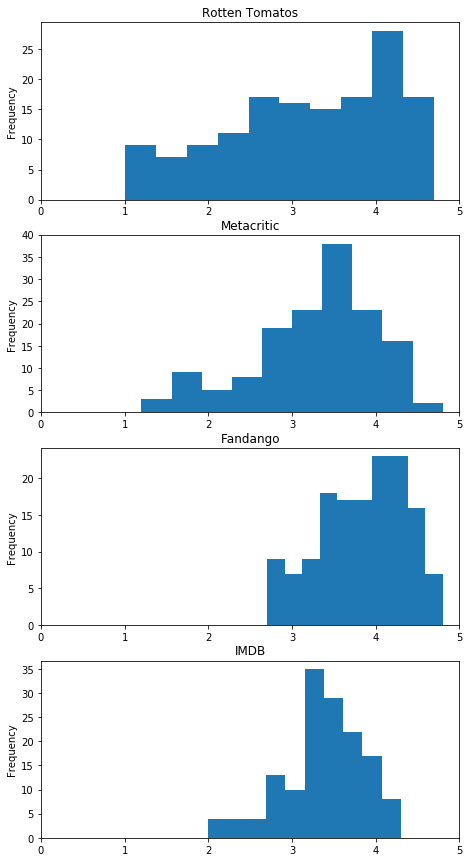

In [101]:
fig = plt.figure(figsize=(7.5,15)) 

ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

ax1.set_xlim(0,5.0)
ax2.set_xlim(0,5.0)
ax3.set_xlim(0,5.0)
ax4.set_xlim(0,5.0)

movie_reviews['RT_user_norm'].plot(kind="hist", ax=ax1,title='Rotten Tomatos')
movie_reviews['Metacritic_user_nom'].plot(kind="hist", ax=ax2, title='Metacritic')
movie_reviews['Fandango_Ratingvalue'].plot(kind="hist", ax=ax3, title='Fandango')
movie_reviews['IMDB_norm'].plot(kind="hist", ax=ax4, title='IMDB' )

In [102]:
user_reviews = movie_reviews[['RT_user_norm', 'Metacritic_user_nom', 'Fandango_Ratingvalue' ,'IMDB_norm']]
user_reviews.head()

,RT_user_norm,Metacritic_user_nom,Fandango_Ratingvalue,IMDB_norm
0,4.3,3.55,4.5,3.90
1,4.0,3.75,4.5,3.55
2,4.5,4.05,4.5,3.90
3,4.2,2.35,4.5,2.70
4,1.4,1.70,3.0,2.55


### Mean

In [103]:
user_reviews_means = user_reviews.apply(np.mean, axis=0)
user_reviews_means

RT_user_norm            3.193836
Metacritic_user_nom     3.259589
Fandango_Ratingvalue    3.845205
IMDB_norm               3.368493
dtype: float64

In [104]:
user_reviews.describe()

,RT_user_norm,Metacritic_user_nom,Fandango_Ratingvalue,IMDB_norm
count,146.000000,146.000000,146.000000,146.000000
mean,3.193836,3.259589,3.845205,3.368493
std,1.001222,0.755356,0.502831,0.479368
min,1.000000,1.200000,2.700000,2.000000
25%,2.500000,2.850000,3.500000,3.150000
50%,3.325000,3.425000,3.900000,3.450000
75%,4.050000,3.750000,4.200000,3.700000
max,4.700000,4.800000,4.800000,4.300000


### Variance And Standard Deviation

In [105]:
user_reviews_vars = user_reviews.apply(np.var)
user_reviews_vars

RT_user_norm            0.995578
Metacritic_user_nom     0.566655
Fandango_Ratingvalue    0.251107
IMDB_norm               0.228220
dtype: float64

In [106]:
user_reviews_stds = user_reviews.apply(np.std)
user_reviews_stds

RT_user_norm            0.997787
Metacritic_user_nom     0.752765
Fandango_Ratingvalue    0.501106
IMDB_norm               0.477723
dtype: float64

### Scatter Plots

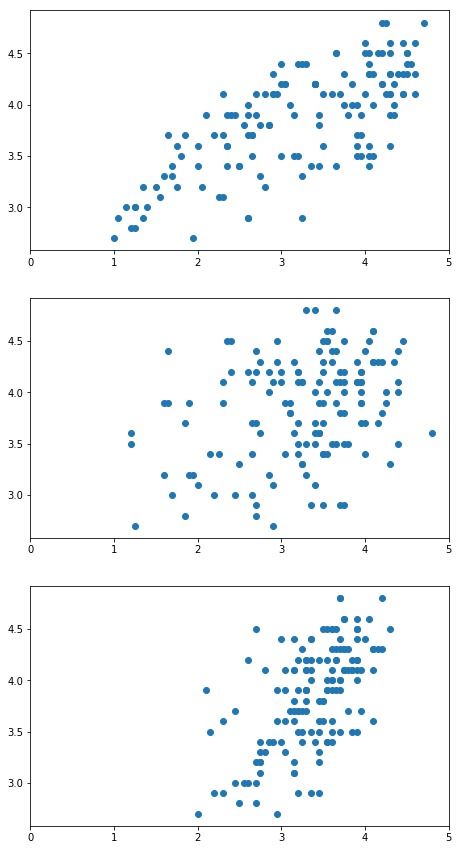

In [107]:
fig = plt.figure(figsize=(7.5,15)) 

ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.set_xlim(0,5.0)
ax2.set_xlim(0,5.0)
ax3.set_xlim(0,5.0)

ax1.scatter(user_reviews['RT_user_norm'], user_reviews['Fandango_Ratingvalue'])
ax2.scatter(user_reviews['Metacritic_user_nom'], user_reviews['Fandango_Ratingvalue'])
ax3.scatter(user_reviews['IMDB_norm'], user_reviews['Fandango_Ratingvalue'])

### Covariance

In [108]:
user_reviews.cov()

,RT_user_norm,Metacritic_user_nom,Fandango_Ratingvalue,IMDB_norm
RT_user_norm,1.002444,0.519663,0.364660,0.429701
Metacritic_user_nom,0.519663,0.570563,0.127977,0.273839
Fandango_Ratingvalue,0.364660,0.127977,0.252839,0.144710
IMDB_norm,0.429701,0.273839,0.144710,0.229794


In [115]:
def calc_covariance(series1, series2):
    mean1 = series1.mean()
    mean2 = series2.mean()
    return sum([(series1[i] - mean1)*(series2[i] - mean2) for i in range(0, len(series1))]) / len(series1)

In [119]:
calc_covariance(user_reviews['RT_user_norm'], user_reviews['IMDB_norm'])

0.42675783449052335

### Correlation

In [120]:
user_reviews.corr()

,RT_user_norm,Metacritic_user_nom,Fandango_Ratingvalue,IMDB_norm
RT_user_norm,1.000000,0.687132,0.724329,0.895297
Metacritic_user_nom,0.687132,1.000000,0.336945,0.756265
Fandango_Ratingvalue,0.724329,0.336945,1.000000,0.600354
IMDB_norm,0.895297,0.756265,0.600354,1.000000


In [121]:
def calc_correlation(series1, series2):
    return calc_covariance(series1, series2)/(series1.std()*series2.std())

In [122]:
calc_correlation(user_reviews['RT_user_norm'], user_reviews['IMDB_norm'])

0.88916506905772275